## Task 22 - Image Processing

In this task we create a random forest model to classify handwritten digits for a sample of the MNIST data provided by
scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import exposure
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Load the MNIST dataset and assign the image data to X and the image labels to y
mnist = load_digits()

X, y = mnist.data, mnist.target

### Pre-processing

Here we reshape the images into 8x8 arrays in preparation for contrast stretching. We then flatten the images back to 1D arrays so that we can perform machine learning on the images.

In [3]:
# Reshape the images to 2D arrays
X = X.reshape(-1, 8, 8)

# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

# covert the list into an array
X_preprocessed = np.array(X_preprocessed)

### Train test split

Here we split our data into train and test sets. The training set is the data to which we fit and tune our model. We will then measure our model's predictions against the actual labels that are contained within the test set. As the data set is relatively large we use a 80:20 split and reserve 20% of the observations for testing.

Note that the test set is data that we have held back and is unseen by our model; in this way we can measure how our model is likely to perform in the 'real-world' on unseen data. 

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

### Fitting the random forest model

As we are working on a classification problem we choose a random forest classifier as our model and then fit this model to the training set.

In [5]:
# Instantiate a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"f1 score: {f1*100:.2f}%")

Accuracy: 98.06%
Precision: 98.20%
Recall: 98.03%
f1 score: 98.10%


### Hyperparameter tuning

The MNIST dataset is relatively large and will be require more computation time to fit a model than for previous tasks. We will tune for the maximum depth *max_depth* of each decision tree. This will take less computation time than tuning for the number of estimators.

In [7]:
# Perform hyperparameter tuning using GridSearchCV
params ={
    'max_depth': [None, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
}
grid_search = GridSearchCV(rf_classifier, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 14}


The best value of max_depth for our model is 14 and so we fit the model using this value. 

In [8]:
best_depth = grid_search.best_params_['max_depth']
best_rf_classifier=RandomForestClassifier(max_depth=best_depth, random_state=42)

best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=42)

### Evaluation

Here we evaluate our model using a confusion matrix, and report on a number of evaluation metrics.

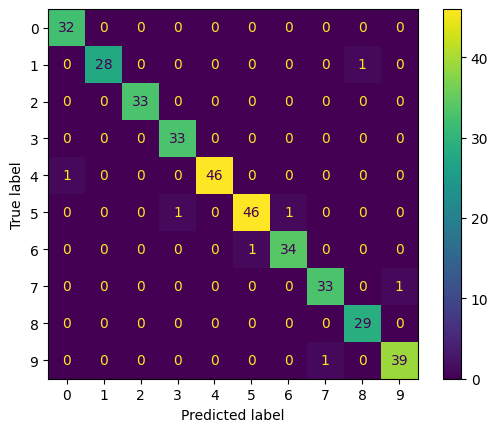

In [9]:
# Make predictions using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

cm = confusion_matrix(y_pred_best, y_test, labels=best_rf_classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_classifier.classes_).plot()

The class that our model struggles with the most is '5' as this has been mis-labelled twice. The numbers '1', '4', '6', '7' & '9' have each been mis-labelled once.

In [10]:
# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

print(f"Accuracy: {accuracy_best*100:.2f}%")
print(f"Precision: {precision_best*100:.2f}%")
print(f"Recall: {recall_best*100:.2f}%")
print(f"f1 score: {f1_best*100:.2f}%")

Accuracy: 98.06%
Precision: 98.20%
Recall: 98.03%
f1 score: 98.10%
